In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns
import calendar

In [2]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [3]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [4]:
data_baseline = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/pH/ph_baseline_2.6_cropped.nc')

In [5]:
data_oae = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/pH/ph_OAE_2.6_cropped.nc')

In [6]:
data_baseline = data_baseline.ph[0,:]
data_oae = data_oae.ph[0,:]

In [7]:
data_baseline = data_baseline.to_dataset(name='ph')
data_oae = data_oae.to_dataset(name='ph')

In [8]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 3.1) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [9]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 3.1) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

### Define conditions

### Data Point Average of pH

In [10]:
sliced_data_baseline_plot = (sliced_data_baseline.ph.mean(dim=('y', 'x'))).to_dataset(name='ph')
sliced_data_oae_plot = (sliced_data_oae.ph.mean(dim=('y', 'x'))).to_dataset(name='ph')

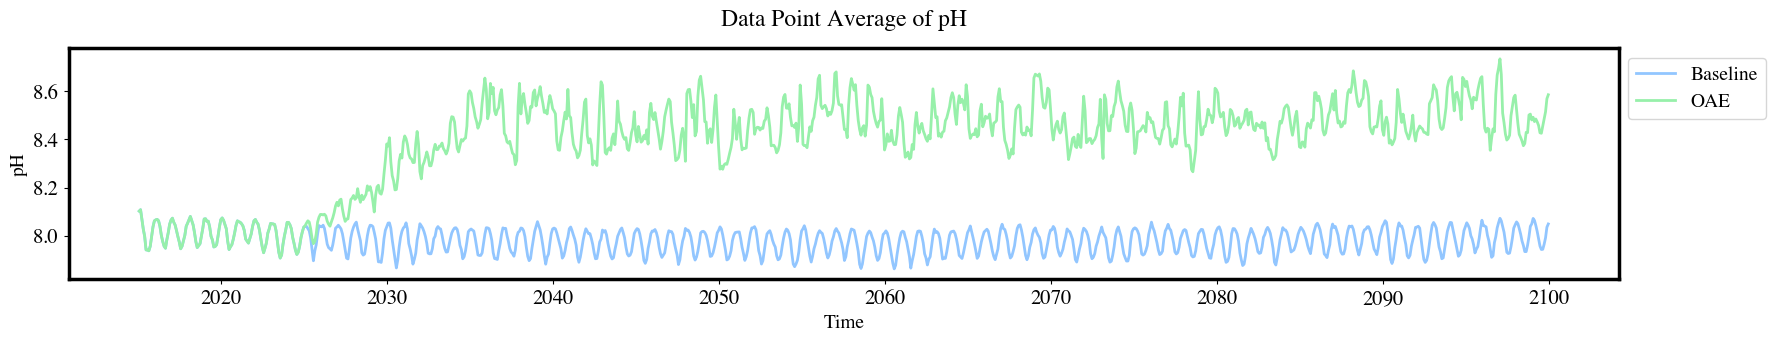

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.ph, linewidth=2, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.ph, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of pH', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [12]:
sliced_frame_baseline_plot = (sliced_frame_baseline.ph.mean(dim=('y', 'x'))).to_dataset(name='ph')
sliced_frame_oae_plot = (sliced_frame_oae.ph.mean(dim=('y', 'x'))).to_dataset(name='ph')

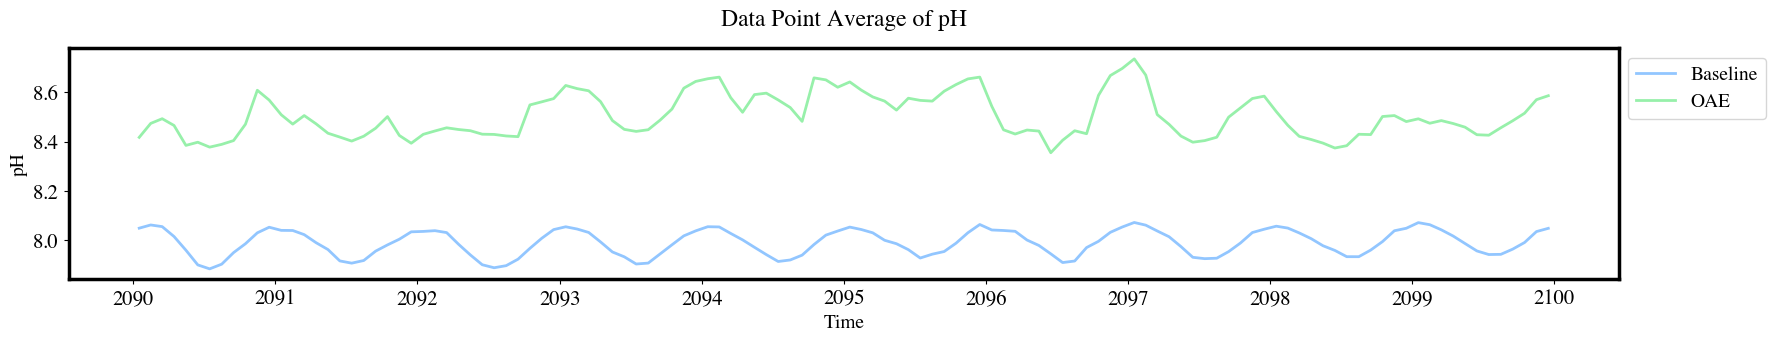

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ph, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ph, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of pH', fontname="Times", fontsize=17, y=1.06)
plt.show()

### Unweighted Data Point Seasonal Average of pH

In [14]:
# condition

start_date = "2090-01-01"
end_date = "2100-01-01"

In [15]:
ph_baseline = sliced_data_baseline["ph"].sel(time_counter=slice(start_date, end_date))

In [16]:
ph_seasonal_mean_baseline = (ph_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)).mean(["y", "x"])

In [17]:
ph_oae = sliced_data_oae["ph"].sel(time_counter=slice(start_date, end_date))

In [18]:
ph_seasonal_mean_oae = (ph_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)).mean(["y", "x"])

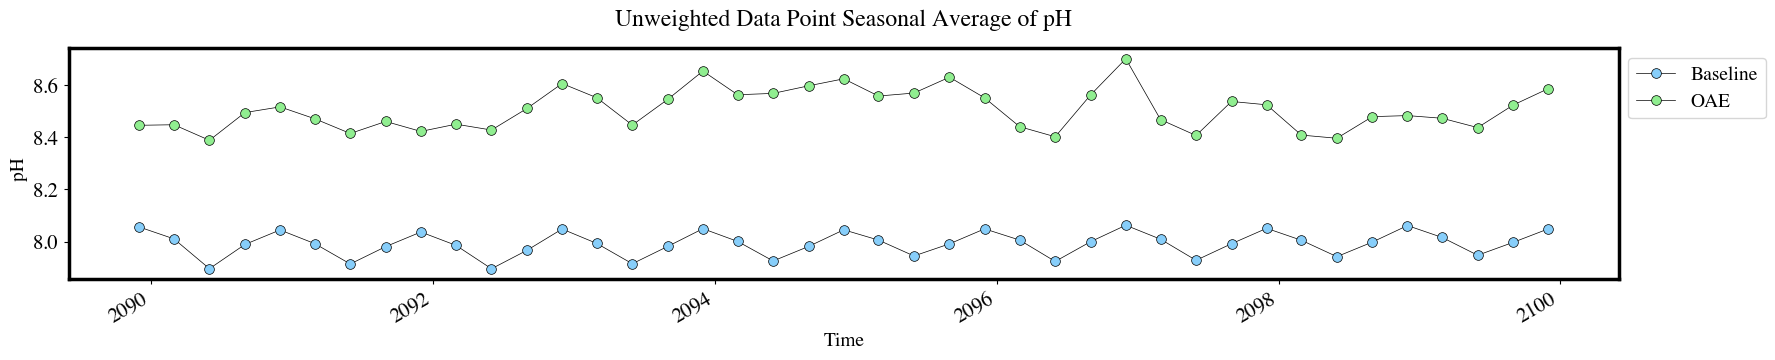

In [19]:
f, ax = plt.subplots(figsize=(20, 3))

ph_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of pH", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH  ", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of pH

In [20]:
month_length_baseline = ph_baseline.time_counter.dt.days_in_month
ph_weighted_mean_baseline = ((ph_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
ph_weighted_season_baseline = (ph_weighted_mean_baseline.where(ph_weighted_mean_baseline)).mean(["y", "x"])

In [21]:
month_length_oae = ph_oae.time_counter.dt.days_in_month
ph_weighted_mean_oae = ((ph_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
ph_weighted_season_oae = (ph_weighted_mean_oae.where(ph_weighted_mean_oae)).mean(["y", "x"])

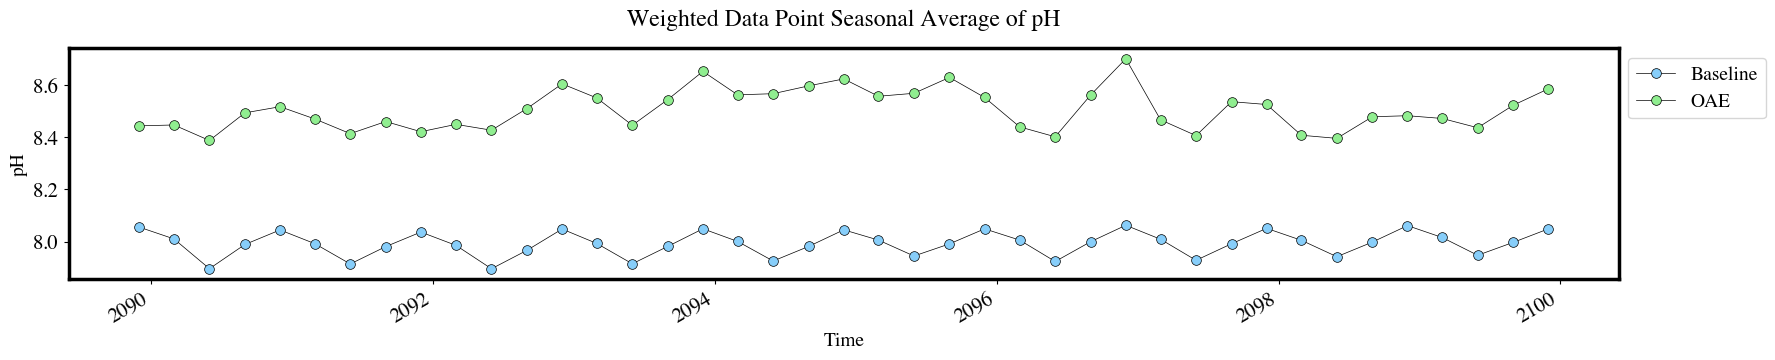

In [22]:
f, ax = plt.subplots(figsize=(20, 3))
ph_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of pH", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of pH (seasons displayed)

In [23]:
# condition

colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

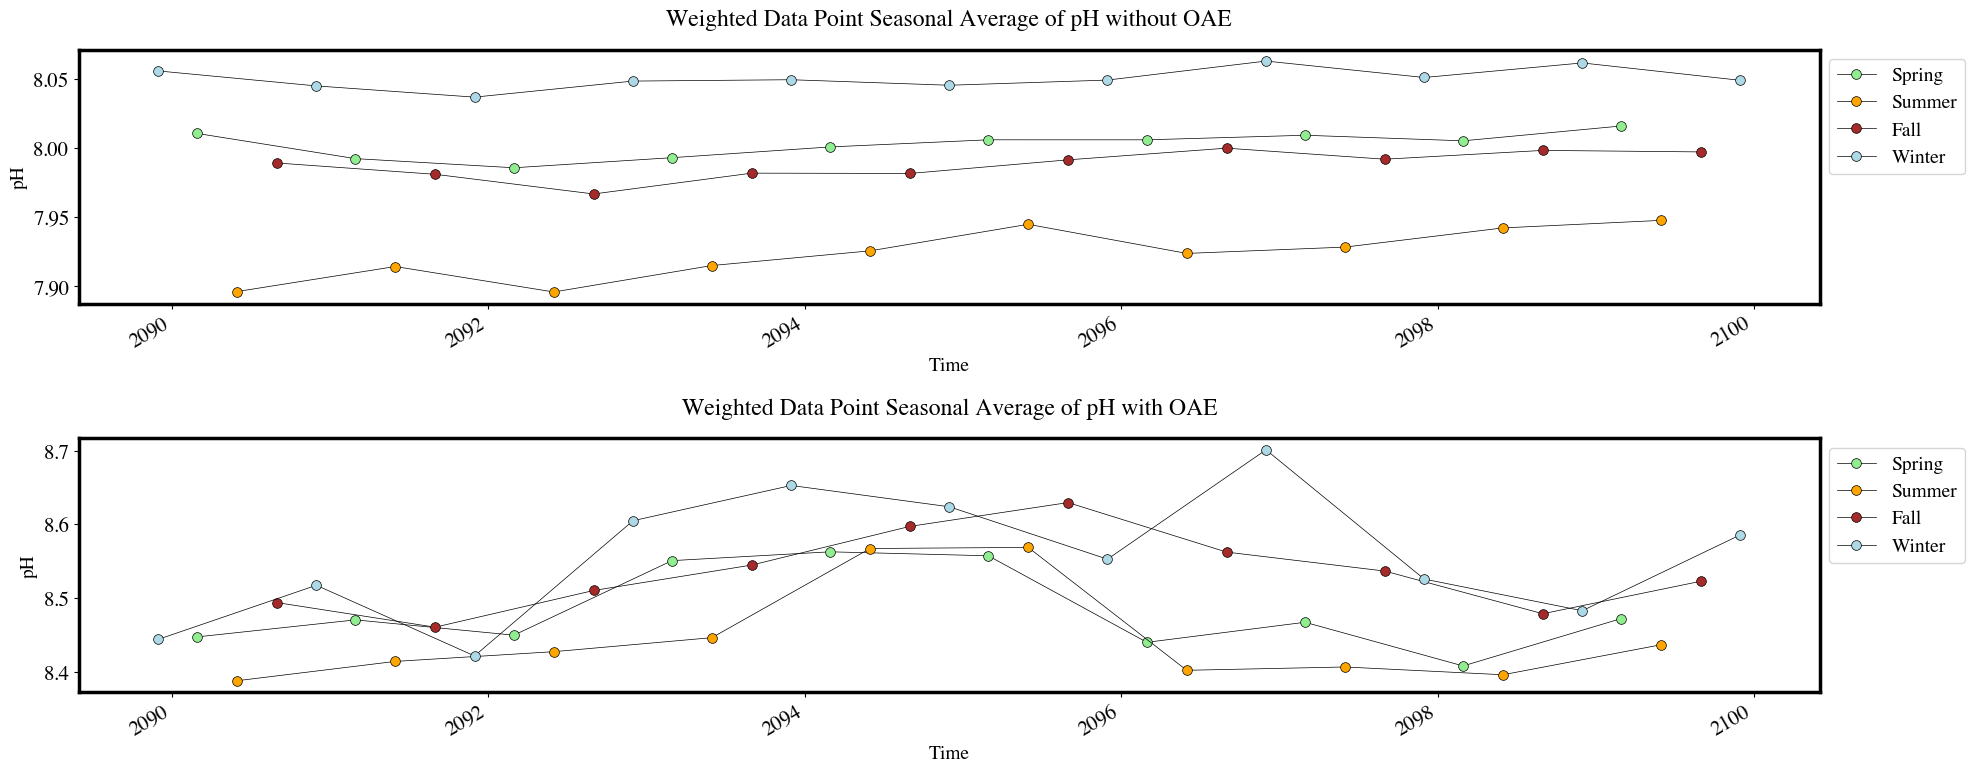

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in ph_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of pH without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('pH', fontsize=14)

for month, arr in ph_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of pH with OAE", fontname="Times", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('pH', fontsize=14)
f.tight_layout()
plt.show()

In [25]:
# define handlers for future legends

In [26]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

### Weighted Data Point Seasonal Average of pH without OAE (seasons displayed)

In [27]:
ph_weighted_baseline = ph_weighted_season_baseline.to_dataframe('ph')
ph_weighted_baseline['Month'] = pd.DatetimeIndex(ph_weighted_baseline.index).month

In [28]:
# condition

conditions_season = [
    (ph_weighted_baseline['Month'] == 3),
    (ph_weighted_baseline['Month'] == 6),
    (ph_weighted_baseline['Month'] == 9),
    (ph_weighted_baseline['Month'] == 12)
]

values_season = ['Spring', 'Summer', 'Fall', 'Winter']

In [29]:
ph_weighted_baseline['Month'] = np.select(conditions_season, values_season)

In [30]:
# condition

colors_season = dict(zip(ph_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

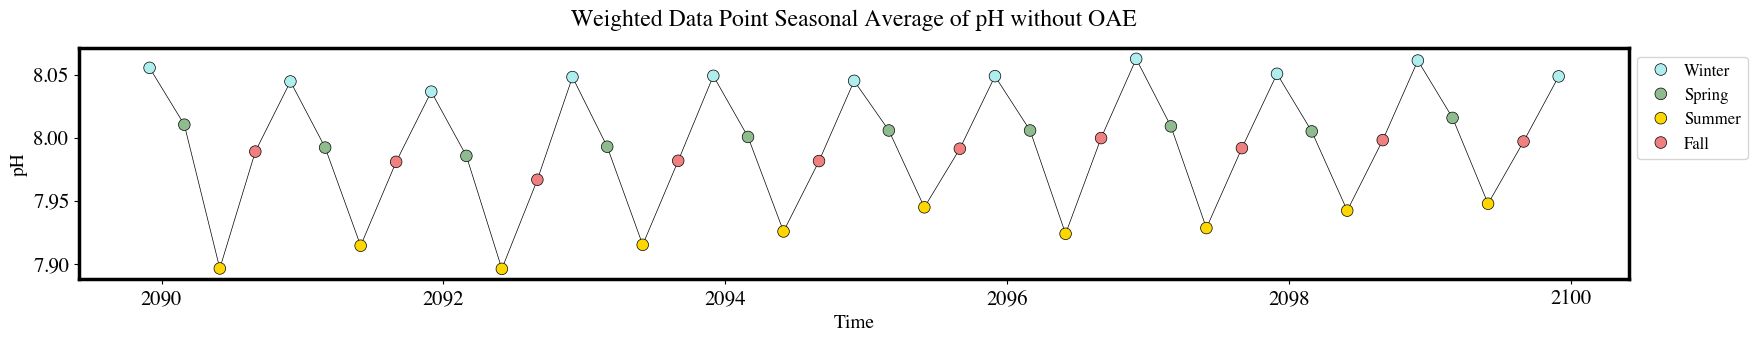

In [31]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.ph, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.ph, color=ph_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of pH without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of pH with OAE (seasons displayed)

In [32]:
ph_weighted_oae = ph_weighted_season_oae.to_dataframe('ph')
ph_weighted_oae['Month'] = pd.DatetimeIndex(ph_weighted_oae.index).month

In [33]:
ph_weighted_oae['Month'] = np.select(conditions_season, values_season)

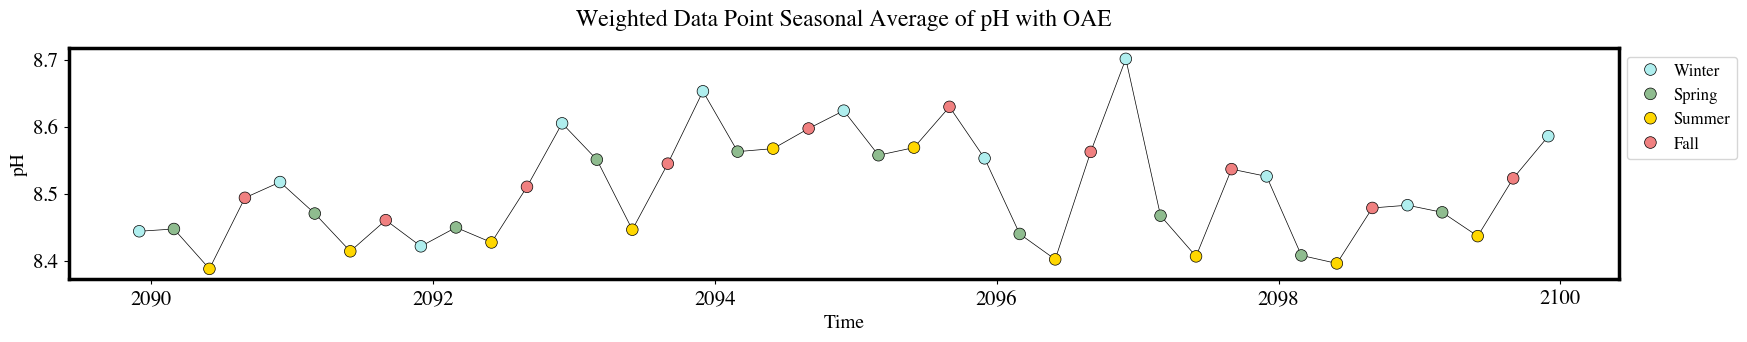

In [34]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.ph, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.ph, color=ph_weighted_oae.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of pH with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of pH (seasons displayed)

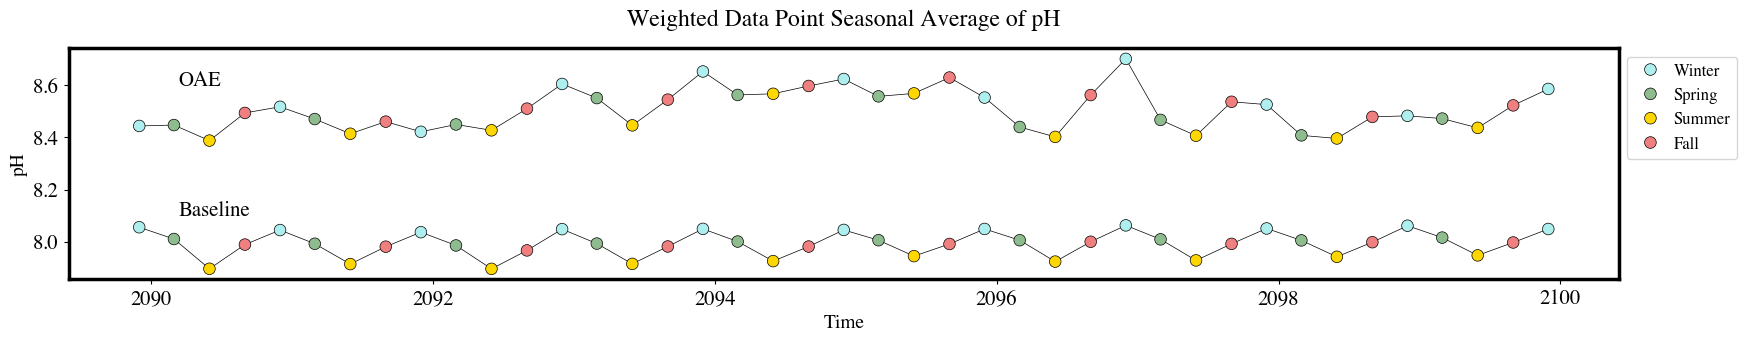

In [35]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.ph, '-', color="black",  linewidth=0.5, zorder=1)
ax.text(43900, 8.1, s='Baseline')
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.ph, color=ph_weighted_baseline.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 8.6, s='OAE')
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.ph, color=ph_weighted_oae.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of pH", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of pH

In [36]:
ph_monthly_mean_baseline = (sliced_data_baseline["ph"].sel(time_counter=slice(start_date, end_date))).mean(["y", "x"])

In [37]:
ph_monthly_mean_oae = (sliced_data_oae["ph"].sel(time_counter=slice(start_date, end_date))).mean(["y", "x"])

In [38]:
month_length_baseline = ph_monthly_mean_baseline.time_counter.dt.days_in_month
ph_weighted_season_baseline = ((ph_monthly_mean_baseline * month_length_baseline).resample(time_counter='M').sum() 
                                    / month_length_baseline.resample(time_counter='M').sum())

In [39]:
month_length_oae = ph_monthly_mean_oae.time_counter.dt.days_in_month
ph_weighted_season_oae = ((ph_monthly_mean_oae * month_length_oae).resample(time_counter='M').sum() 
                           / month_length_oae.resample(time_counter='M').sum())

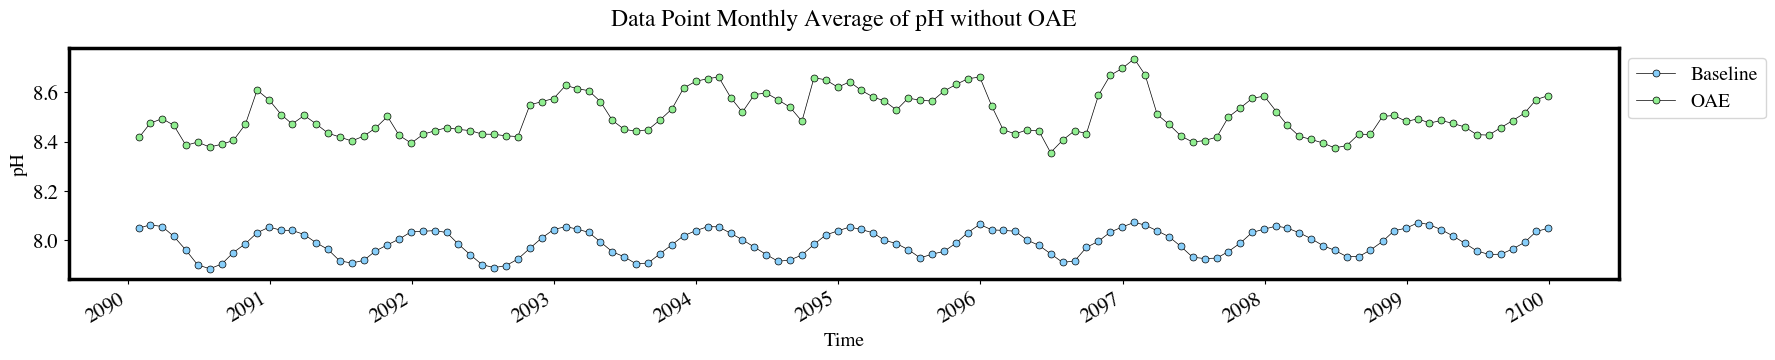

In [40]:
f, ax = plt.subplots(figsize=(20, 3))

ph_weighted_season_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_weighted_season_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Data Point Monthly Average of pH without OAE", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Data Point Monthly Average of pH without OAE (months displayed)

In [71]:
ph_baseline_monthly

,time,ph,Month
time_counter,,,
2090-01-31,0.0,8.049456,Jan
2090-02-28,0.0,8.062417,Feb
2090-03-31,0.0,8.055734,Mar
2090-04-30,0.0,8.015552,Apr
2090-05-31,0.0,7.960205,May
...,...,...,...
2099-08-31,0.0,7.943429,Aug
2099-09-30,0.0,7.964511,Sept
2099-10-31,0.0,7.991401,Oct


In [41]:
ph_baseline_monthly = ph_weighted_season_baseline.to_dataframe('ph')
ph_baseline_monthly['Month'] = pd.DatetimeIndex(ph_baseline_monthly.index).month

In [42]:
# condition

conditions_month = [
    (ph_baseline_monthly['Month'] == 1),
    (ph_baseline_monthly['Month'] == 2),
    (ph_baseline_monthly['Month'] == 3),
    (ph_baseline_monthly['Month'] == 4),
    (ph_baseline_monthly['Month'] == 5),
    (ph_baseline_monthly['Month'] == 6),
    (ph_baseline_monthly['Month'] == 7),
    (ph_baseline_monthly['Month'] == 8),
    (ph_baseline_monthly['Month'] == 9),
    (ph_baseline_monthly['Month'] == 10),
    (ph_baseline_monthly['Month'] == 11),
    (ph_baseline_monthly['Month'] == 12)
]

values_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [43]:
ph_baseline_monthly['Month'] = np.select(conditions_month, values_month)

In [44]:
# condition

colors_month = dict(zip(ph_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

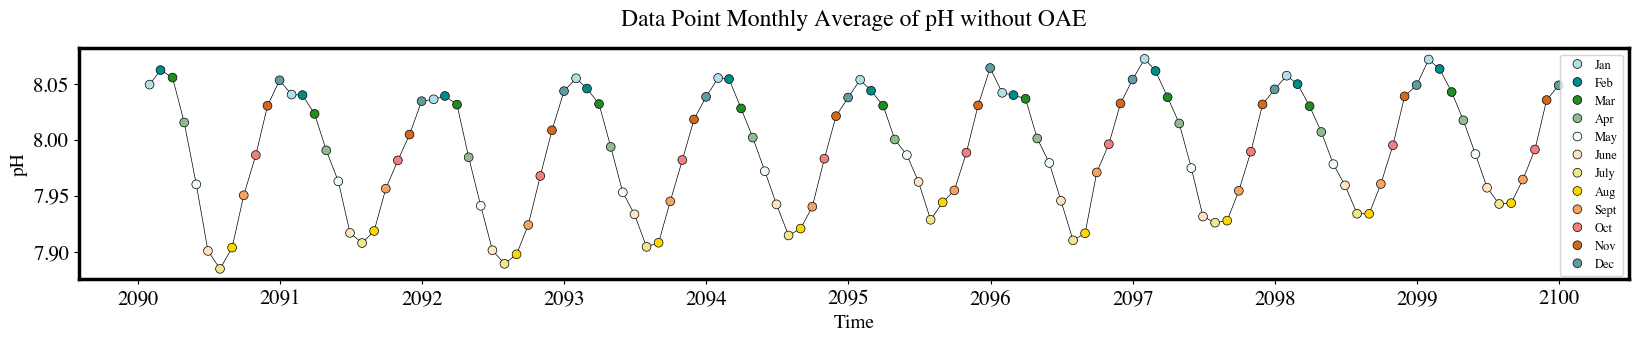

In [45]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Data Point Monthly Average of pH without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of pH with OAE (months displayed)

In [46]:
ph_oae_monthly = ph_weighted_season_oae.to_dataframe('ph')
ph_oae_monthly['Month'] = pd.DatetimeIndex(ph_oae_monthly.index).month

In [47]:
ph_oae_monthly['Month'] = np.select(conditions_month, values_month)

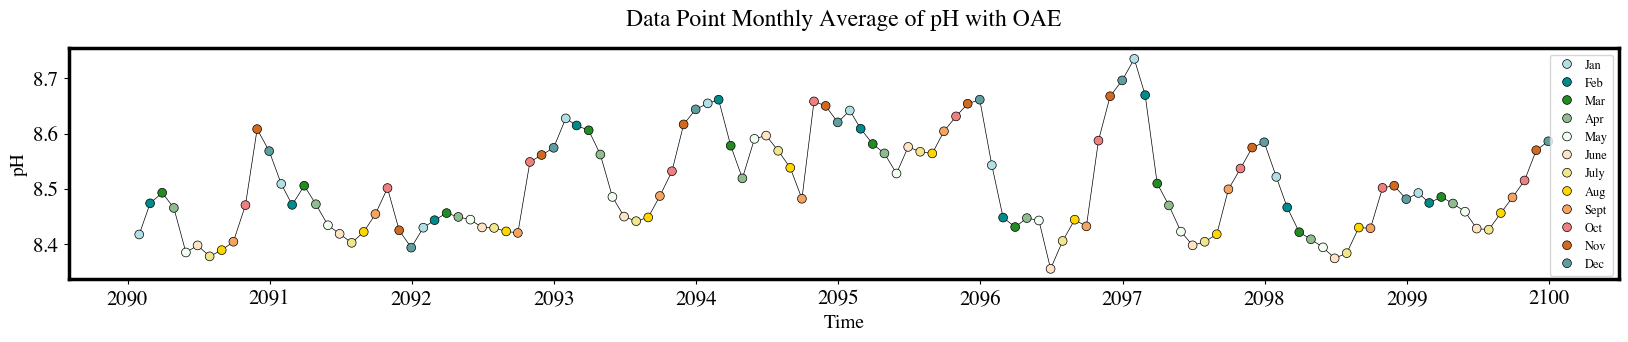

In [48]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Data Point Monthly Average of pH with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of pH (months displayed)

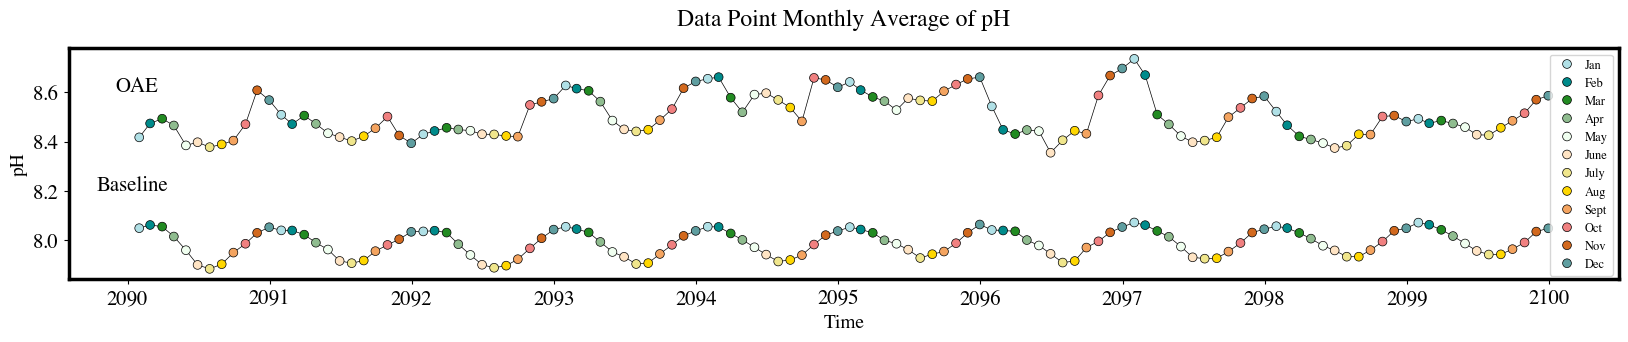

In [49]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43750, 8.2, s='Baseline')
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 8.6, s='OAE')
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Data Point Monthly Average of pH", fontsize=17, y=1.06)

pass

In [50]:
mean_baseline = (ph_baseline_monthly.groupby(ph_baseline_monthly.index.month).ph.mean()).reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [51]:
mean_oae = (ph_oae_monthly.groupby(ph_oae_monthly.index.month).ph.mean()).reset_index()
mean_oae['time_counter'] = mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [52]:
# condition

colors_time = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

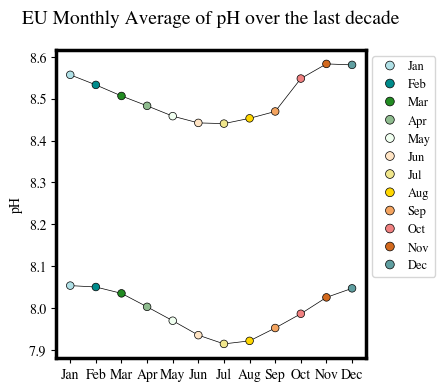

In [53]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(mean_baseline.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_baseline.time_counter, mean_baseline.ph, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax.plot(mean_oae.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_oae.time_counter, mean_oae.ph, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_time.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})
ax.set_ylabel('pH', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.yaxis.get_offset_text().set_fontsize(10)

ax.set_title("EU Monthly Average of pH over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### Δ pH between Baseline and OAE

In [54]:
delta_ph = (ph_oae_monthly.ph - ph_baseline_monthly.ph).to_xarray()

In [55]:
delta_ph = delta_ph.to_dataframe('ph')
delta_ph['Month'] = pd.DatetimeIndex(delta_ph.index).month

In [56]:
delta_ph['Month'] = np.select(conditions_month, values_month)

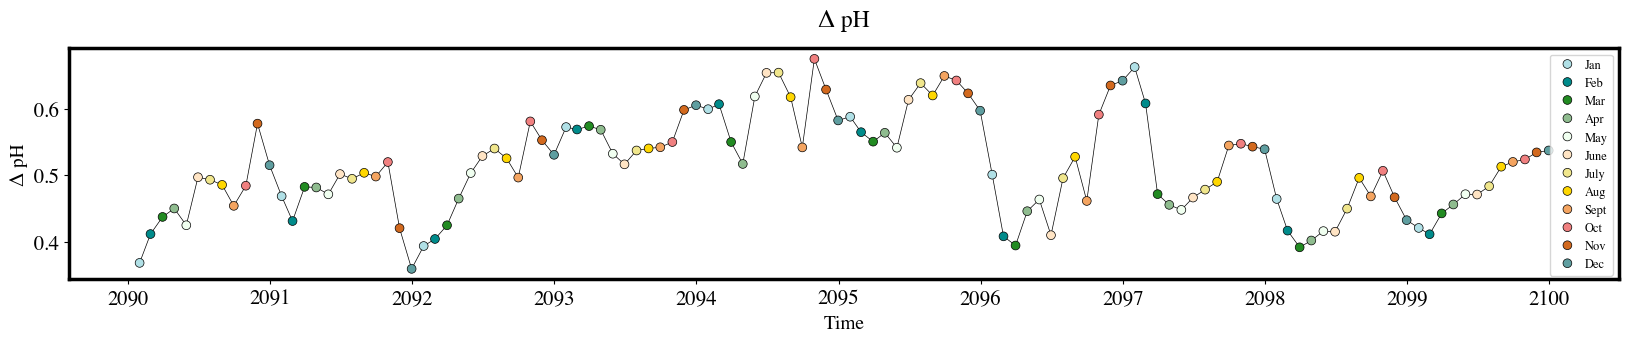

In [57]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_ph.index, delta_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_ph.index, delta_ph.ph, color=delta_ph.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ pH', fontsize=14)
ax.set_title("Δ pH", fontname="Times", fontsize=17, y=1.06)

pass

### Averaged monthly cycle of Δ pH

In [58]:
delta_ph_mean = (delta_ph.groupby(delta_ph.index.month).ph.mean()).reset_index()
delta_ph_mean['time_counter'] = delta_ph_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

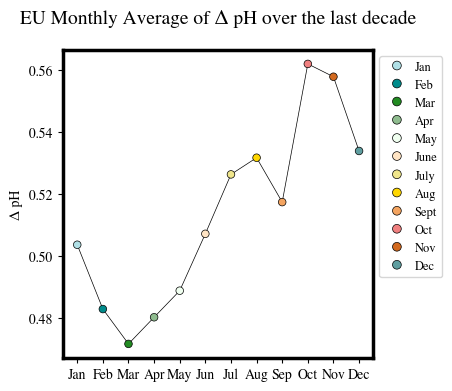

In [59]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(delta_ph_mean.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_ph_mean.time_counter, delta_ph_mean.ph, color=delta_ph_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Δ pH', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title("EU Monthly Average of Δ pH over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

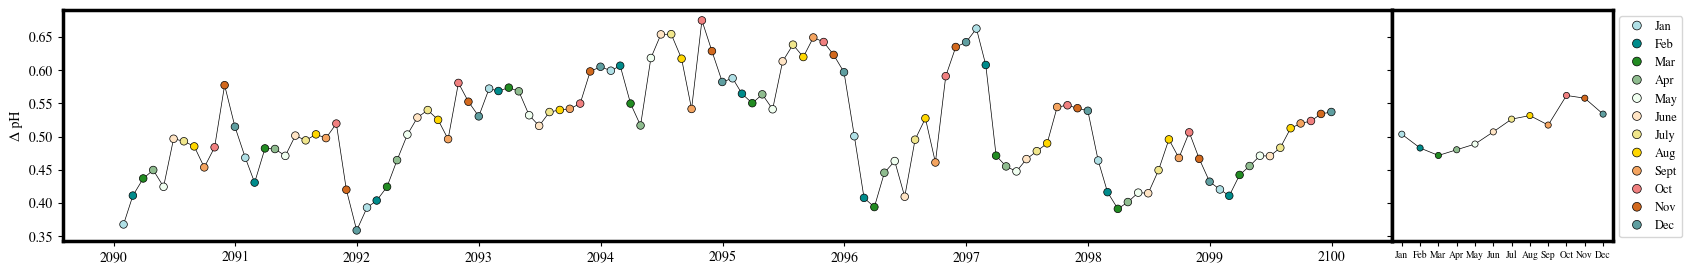

In [60]:
f, (ax, ax2) = plt.subplots(1,2, figsize=(20, 3), gridspec_kw={'width_ratios': [6, 1]}, sharey=True) 
plt.subplots_adjust(wspace=0, hspace=0)


ax.plot_date(delta_ph.index, delta_ph.ph, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.scatter(delta_ph.index, delta_ph.ph, color=delta_ph.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Δ pH', fontsize=10)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax2.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(delta_ph_mean.ph, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_ph_mean.time_counter, delta_ph_mean.ph, color=delta_ph_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=20)

ax2.tick_params(axis='x', which='major', labelsize=7)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/pH/figs/DPph_change_monthly_mean.png')

pass

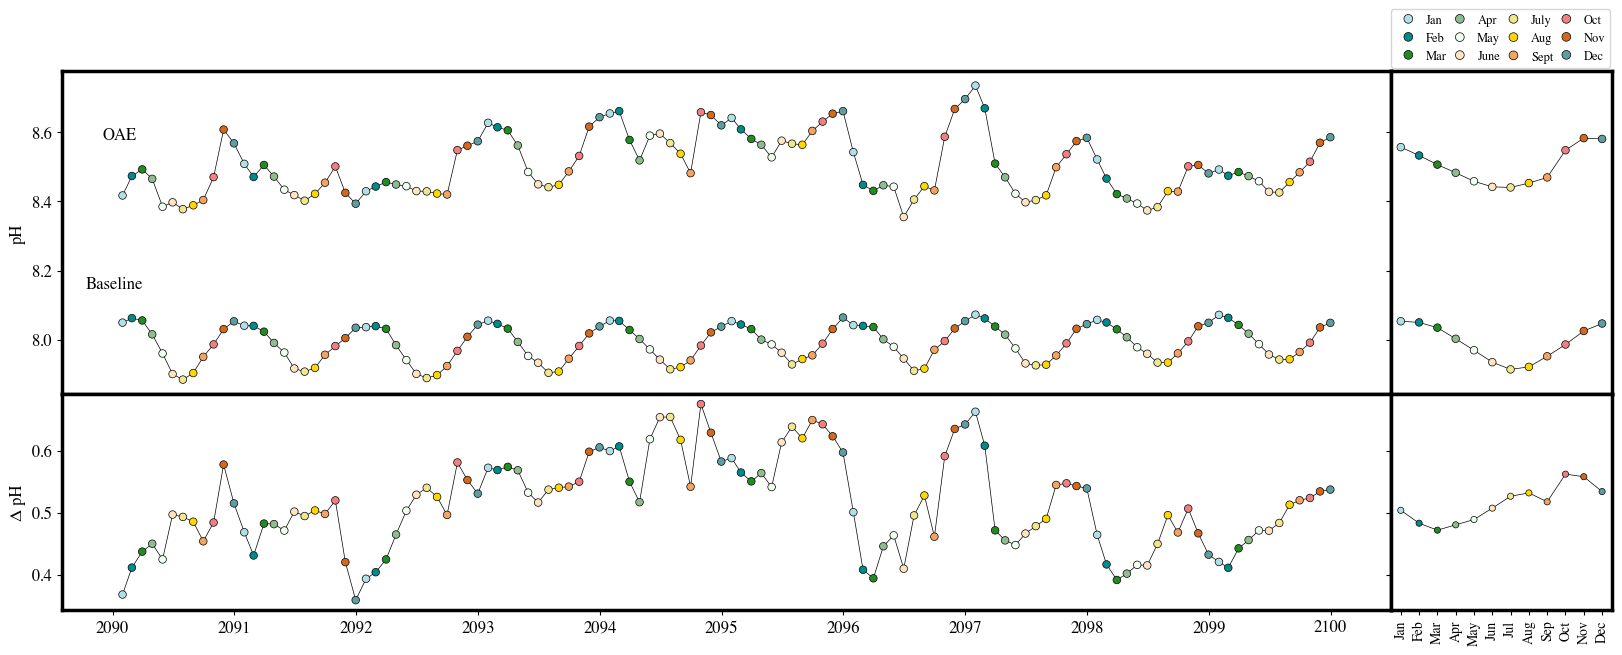

In [61]:
f, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 7), gridspec_kw={'width_ratios': [6, 1], 'height_ratios': [3, 2]}, sharey='row')  
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.text(43750, 8.15, s='Baseline', fontsize=12)
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 8.58, s='OAE', fontsize=12)
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel("pH", fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.17, 1.21), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(mean_baseline.ph, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_baseline.time_counter, mean_baseline.ph, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.plot(mean_oae.ph, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_oae.time_counter, mean_oae.ph, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.tick_params(axis='x', which='major', labelsize=8)
ax2.tick_params(axis='y', which='major', labelsize=12)

ax3.plot_date(delta_ph.index, delta_ph.ph, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax3.scatter(delta_ph.index, delta_ph.ph, color=delta_ph.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_ylabel('Δ pH', fontsize=12)

ax4.plot(delta_ph_mean.ph, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_ph_mean.time_counter, delta_ph_mean.ph, color=delta_ph_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=20)

ax4.tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax4.tick_params(axis='y', which='major', labelsize=12)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/pH/figs/DPpH_monthly_mean.png')

pass

In [62]:
# summary_amplitude = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Summary_amplitude.csv', header=[0,1], index_col=0)

# summary_amplitude.loc['pH', ('Location Point','With OAE')] = round(mean_oae.ph.max() - mean_oae.ph.min(), 3)

# summary_amplitude.loc['pH', ('Location Point','Without OAE')] = round(mean_baseline.ph.max() - mean_baseline.ph.min(), 3)

# summary_amplitude.to_csv('../Summary_amplitude.csv')

# print(summary_amplitude.style.to_latex())

# summary_maxmin = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Summary_minmax_dp.csv', header=[0,1], index_col=0)

# summary_maxmin.loc['pH', ('Without OAE','Max')] = round(mean_baseline.ph.max(), 3)
# summary_maxmin.loc['pH', ('Without OAE','Min')] = round(mean_baseline.ph.min(), 3)

# summary_maxmin.loc['pH', ('With OAE','Max')] = round(mean_oae.ph.max(), 3)
# summary_maxmin.loc['pH', ('With OAE','Min')] = round(mean_oae.ph.min(), 3)

# summary_maxmin.to_csv('../Summary_minmax_dp.csv')